In [41]:
import pandas as pd

In [42]:
df=pd.read_csv("Desktop/ML/titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [43]:
import math
d=math.floor(df.Age.median())
df.Age=df.Age.fillna(d)


In [44]:

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [45]:
df.Name=label.fit_transform(df.Name)
df.Gender=label.fit_transform(df.Gender)
df.head(4)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Fare
0,1,0,3,108,1,22.0,1,0,7.2500
1,2,1,1,190,0,38.0,1,0,71.2833
2,3,1,3,353,0,26.0,0,0,7.9250
3,4,1,1,272,0,35.0,1,0,53.1000


In [46]:
x=df.drop("Survived",axis=1)
y=df.Survived

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [48]:
from sklearn import tree

In [49]:
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
model.score(x_test,y_test)

0.7761194029850746

In [55]:
pred=model.predict(x_test)

In [58]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(pred,y_test)
cn

array([[132,  26],
       [ 34,  76]], dtype=int64)

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

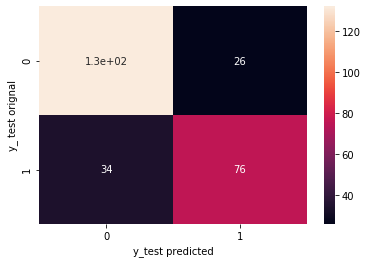

In [66]:
sns.heatmap(cn,annot=True)
plt.xlabel("y_test predicted")
plt.ylabel("y_ test orignal")
plt.show()